In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pyagrum as gum
import pyagrum.lib.notebook as gnb

import sys, os
root_dir = os.path.abspath("..")
if root_dir not in sys.path:
    sys.path.append(root_dir)

from fci import *
import pandas as pd

from IPython.display import display, Markdown

In [4]:
bn = gum.loadBN("instances/asia.bif")
bn

(pyagrum.BayesNet@0x12f215800) BN{nodes: 8, arcs: 8, domainSize: 256, dim: 18, mem: 288o}

In [28]:
from tqdm import tqdm
for i in tqdm(range(10)):
    gum.generateSample(bn, 1_000_000, f"data/asia-test{i+1}.csv")

100%|███████████████████████████████████████████| 10/10 [00:26<00:00,  2.66s/it]


CPU times: user 2.49 s, sys: 214 ms, total: 2.71 s
Wall time: 312 ms
CPU times: user 1.04 s, sys: 87.2 ms, total: 1.13 s
Wall time: 133 ms


## Results of the data/asia-test8.csv

### Markov equivalence class (PAG)

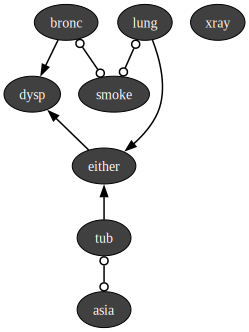

### Causal differences

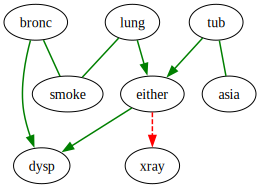

CPU times: user 2.24 s, sys: 192 ms, total: 2.44 s
Wall time: 276 ms
CPU times: user 911 ms, sys: 76.2 ms, total: 987 ms
Wall time: 112 ms


## Results of the data/asia-test9.csv

### Markov equivalence class (PAG)

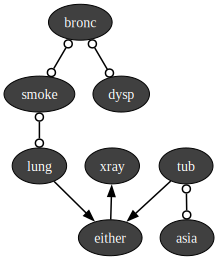

### Causal differences

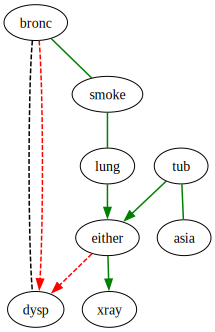

CPU times: user 2.22 s, sys: 196 ms, total: 2.41 s
Wall time: 286 ms
CPU times: user 780 ms, sys: 63.1 ms, total: 843 ms
Wall time: 97.4 ms


## Results of the data/asia-test10.csv

### Markov equivalence class (PAG)

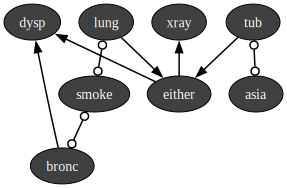

### Causal differences

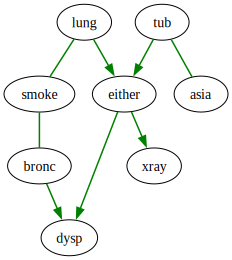

CPU times: user 2.24 s, sys: 184 ms, total: 2.43 s
Wall time: 309 ms
CPU times: user 1.02 s, sys: 87.3 ms, total: 1.11 s
Wall time: 131 ms


## Results of the data/asia-test4.csv

### Markov equivalence class (PAG)

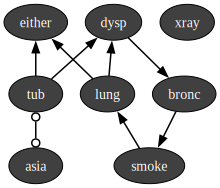

### Causal differences

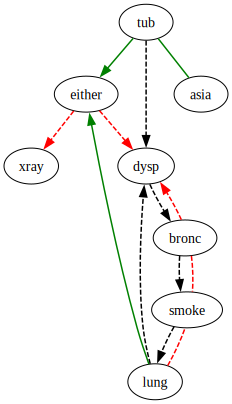

CPU times: user 2.25 s, sys: 191 ms, total: 2.44 s
Wall time: 288 ms
CPU times: user 1.28 s, sys: 107 ms, total: 1.39 s
Wall time: 168 ms


## Results of the data/asia-test5.csv

### Markov equivalence class (PAG)

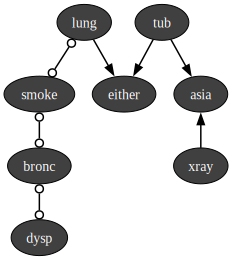

### Causal differences

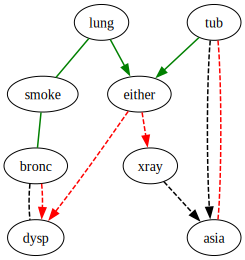

CPU times: user 2.31 s, sys: 199 ms, total: 2.51 s
Wall time: 301 ms
CPU times: user 1.1 s, sys: 94.7 ms, total: 1.19 s
Wall time: 145 ms


## Results of the data/asia-test7.csv

### Markov equivalence class (PAG)

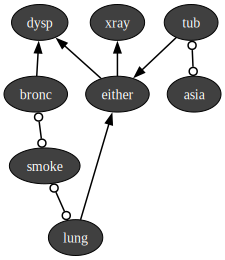

### Causal differences

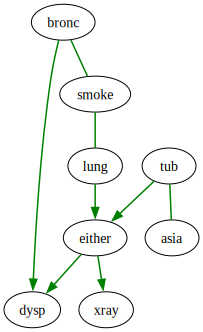

CPU times: user 2.24 s, sys: 192 ms, total: 2.44 s
Wall time: 288 ms
CPU times: user 1.42 s, sys: 123 ms, total: 1.55 s
Wall time: 186 ms


## Results of the data/asia-test6.csv

### Markov equivalence class (PAG)

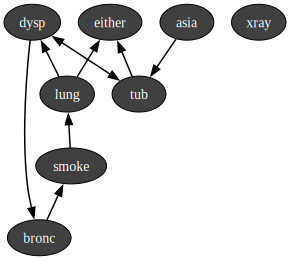

### Causal differences

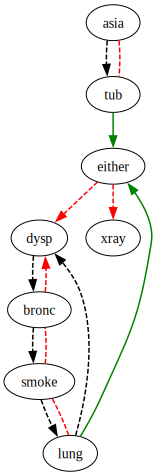

CPU times: user 2.4 s, sys: 208 ms, total: 2.61 s
Wall time: 307 ms
CPU times: user 1.04 s, sys: 88.5 ms, total: 1.13 s
Wall time: 132 ms


## Results of the data/asia-test2.csv

### Markov equivalence class (PAG)

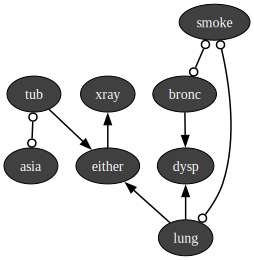

### Causal differences

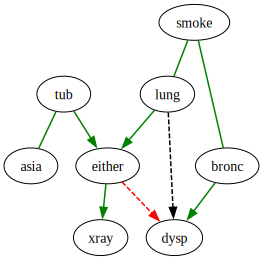

CPU times: user 2.18 s, sys: 189 ms, total: 2.37 s
Wall time: 284 ms
CPU times: user 1.21 s, sys: 100 ms, total: 1.31 s
Wall time: 151 ms


## Results of the data/asia-test3.csv

### Markov equivalence class (PAG)

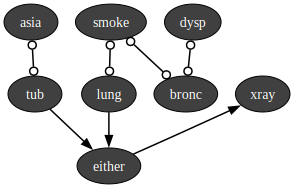

### Causal differences

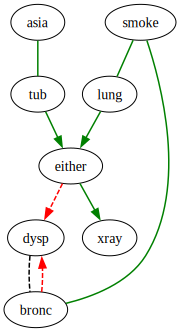

CPU times: user 2.21 s, sys: 193 ms, total: 2.4 s
Wall time: 290 ms
CPU times: user 867 ms, sys: 72.7 ms, total: 940 ms
Wall time: 113 ms


## Results of the data/asia-test1.csv

### Markov equivalence class (PAG)

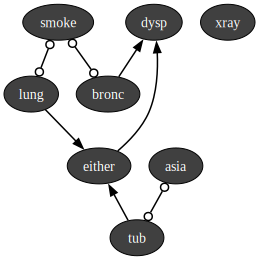

### Causal differences

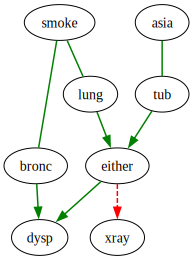

In [5]:
from pathlib import Path

for name in Path("data/").glob("asia-test*"):
    df = pd.read_csv(name)

    learner = gum.BNLearner(df)
    learner.useMIIC()
    
    %time gumPDAG = learner.learnPDAG()
    %time pag, _ = fci(learner, ruleVerbose=False)

    display(
        Markdown(f"## Results of the {name}"),
        Markdown("### Markov equivalence class (PAG)"),
        toDot(pag),
        Markdown("### Causal differences"),
        showCausalDifferences(pag, gumPDAG, learner.names())
    )

CPU times: user 1.25 s, sys: 117 ms, total: 1.36 s
Wall time: 193 ms
CPU times: user 672 ms, sys: 52.5 ms, total: 725 ms
Wall time: 105 ms


## Results of the data/asia-test8.csv

### Markov equivalence class (PAG)

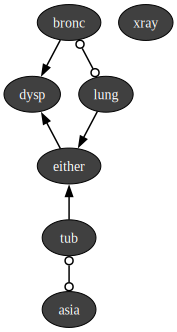

### Causal differences

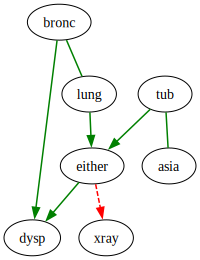

CPU times: user 1.27 s, sys: 125 ms, total: 1.4 s
Wall time: 180 ms
CPU times: user 731 ms, sys: 64 ms, total: 795 ms
Wall time: 104 ms


## Results of the data/asia-test9.csv

### Markov equivalence class (PAG)

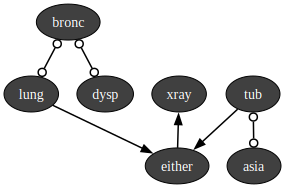

### Causal differences

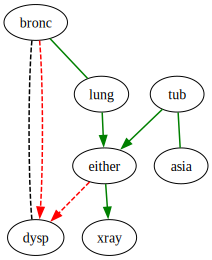

CPU times: user 1.31 s, sys: 124 ms, total: 1.43 s
Wall time: 184 ms
CPU times: user 525 ms, sys: 41.2 ms, total: 566 ms
Wall time: 71.2 ms


## Results of the data/asia-test10.csv

### Markov equivalence class (PAG)

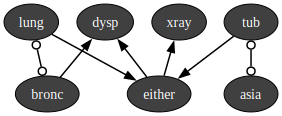

### Causal differences

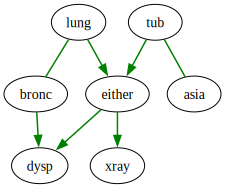

CPU times: user 1.19 s, sys: 120 ms, total: 1.31 s
Wall time: 182 ms
CPU times: user 810 ms, sys: 73.6 ms, total: 883 ms
Wall time: 120 ms


## Results of the data/asia-test4.csv

### Markov equivalence class (PAG)

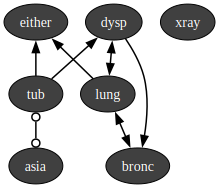

### Causal differences

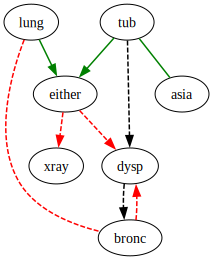

CPU times: user 1.33 s, sys: 130 ms, total: 1.46 s
Wall time: 197 ms
CPU times: user 1.07 s, sys: 97.4 ms, total: 1.17 s
Wall time: 154 ms


## Results of the data/asia-test5.csv

### Markov equivalence class (PAG)

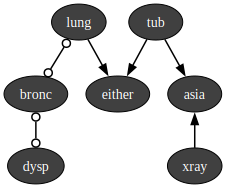

### Causal differences

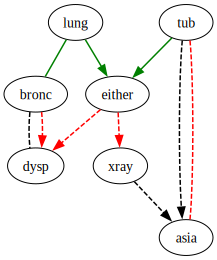

CPU times: user 1.29 s, sys: 126 ms, total: 1.41 s
Wall time: 402 ms
CPU times: user 1.06 s, sys: 95.8 ms, total: 1.16 s
Wall time: 341 ms


## Results of the data/asia-test7.csv

### Markov equivalence class (PAG)

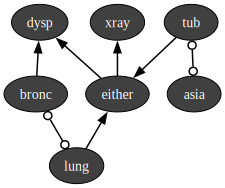

### Causal differences

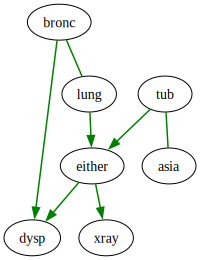

CPU times: user 1.27 s, sys: 107 ms, total: 1.38 s
Wall time: 175 ms
CPU times: user 696 ms, sys: 55.3 ms, total: 752 ms
Wall time: 100 ms


## Results of the data/asia-test6.csv

### Markov equivalence class (PAG)

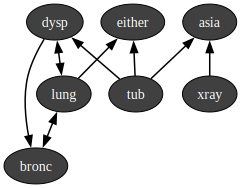

### Causal differences

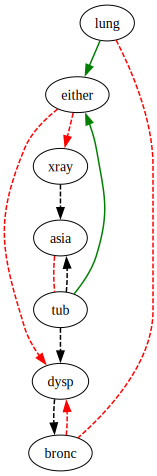

CPU times: user 1.34 s, sys: 123 ms, total: 1.47 s
Wall time: 186 ms
CPU times: user 816 ms, sys: 71.8 ms, total: 888 ms
Wall time: 114 ms


## Results of the data/asia-test2.csv

### Markov equivalence class (PAG)

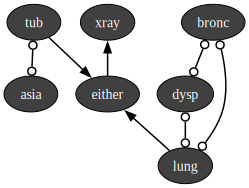

### Causal differences

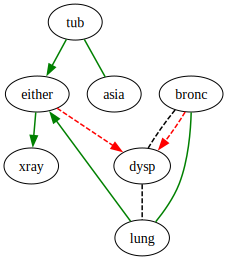

CPU times: user 1.31 s, sys: 122 ms, total: 1.43 s
Wall time: 182 ms
CPU times: user 829 ms, sys: 74.9 ms, total: 904 ms
Wall time: 117 ms


## Results of the data/asia-test3.csv

### Markov equivalence class (PAG)

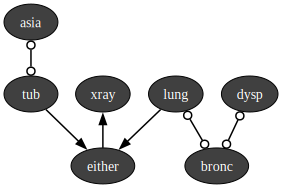

### Causal differences

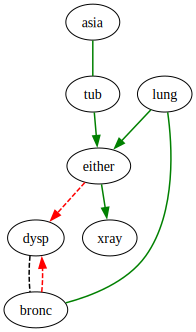

CPU times: user 1.27 s, sys: 119 ms, total: 1.39 s
Wall time: 178 ms
CPU times: user 791 ms, sys: 71.4 ms, total: 862 ms
Wall time: 111 ms


## Results of the data/asia-test1.csv

### Markov equivalence class (PAG)

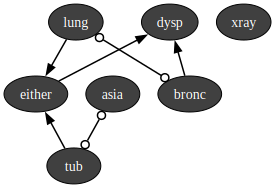

### Causal differences

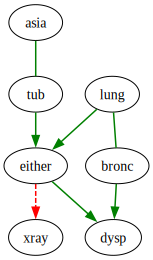

In [43]:
for name in Path("data/").glob("asia-test*"):
    df = pd.read_csv(name)
    df = df.drop(["smoke"], axis=1)

    learner = gum.BNLearner(df)
    learner.useMIIC()
    
    %time gumPDAG = learner.learnPDAG()
    %time pag, _ = fci(learner, ruleVerbose=False)

    display(
        Markdown(f"## Results of the {name}"),
        Markdown("### Markov equivalence class (PAG)"),
        toDot(pag),
        Markdown("### Causal differences"),
        showCausalDifferences(pag, gumPDAG, learner.names())
    )

CPU times: user 1.38 s, sys: 128 ms, total: 1.51 s
Wall time: 213 ms
CPU times: user 979 ms, sys: 71 ms, total: 1.05 s
Wall time: 137 ms


## Results of the data/asia-test8.csv

### Markov equivalence class (PAG)

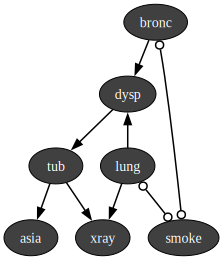

### Causal differences

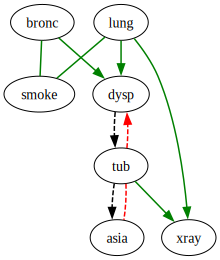

CPU times: user 1.24 s, sys: 107 ms, total: 1.35 s
Wall time: 181 ms
CPU times: user 721 ms, sys: 56.9 ms, total: 778 ms
Wall time: 103 ms


## Results of the data/asia-test9.csv

### Markov equivalence class (PAG)

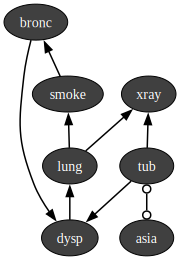

### Causal differences

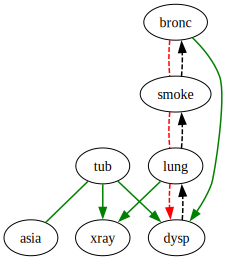

CPU times: user 1.23 s, sys: 112 ms, total: 1.34 s
Wall time: 193 ms
CPU times: user 889 ms, sys: 75.8 ms, total: 964 ms
Wall time: 150 ms


## Results of the data/asia-test10.csv

### Markov equivalence class (PAG)

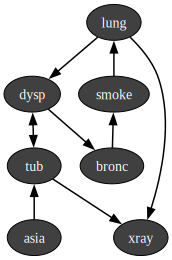

### Causal differences

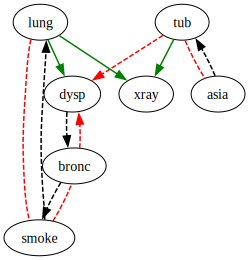

CPU times: user 1.52 s, sys: 130 ms, total: 1.65 s
Wall time: 453 ms
CPU times: user 982 ms, sys: 87.6 ms, total: 1.07 s
Wall time: 394 ms


## Results of the data/asia-test4.csv

### Markov equivalence class (PAG)

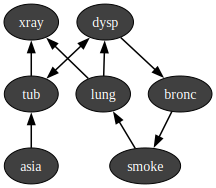

### Causal differences

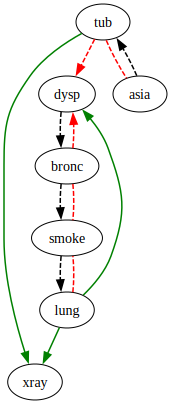

CPU times: user 1.21 s, sys: 114 ms, total: 1.32 s
Wall time: 197 ms
CPU times: user 847 ms, sys: 72.1 ms, total: 919 ms
Wall time: 141 ms


## Results of the data/asia-test5.csv

### Markov equivalence class (PAG)

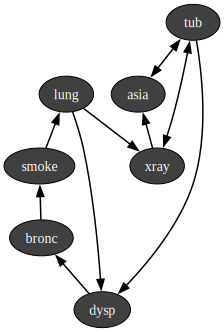

### Causal differences

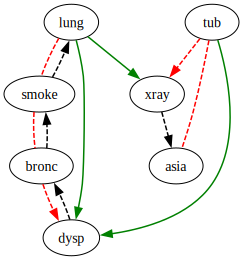

CPU times: user 1.29 s, sys: 103 ms, total: 1.39 s
Wall time: 193 ms
CPU times: user 856 ms, sys: 65.2 ms, total: 921 ms
Wall time: 122 ms


## Results of the data/asia-test7.csv

### Markov equivalence class (PAG)

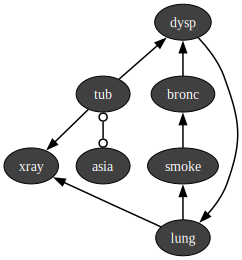

### Causal differences

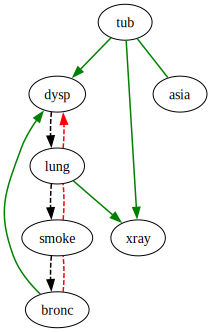

CPU times: user 1.26 s, sys: 116 ms, total: 1.38 s
Wall time: 196 ms
CPU times: user 880 ms, sys: 68 ms, total: 948 ms
Wall time: 126 ms


## Results of the data/asia-test6.csv

### Markov equivalence class (PAG)

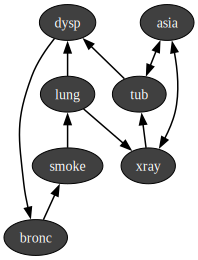

### Causal differences

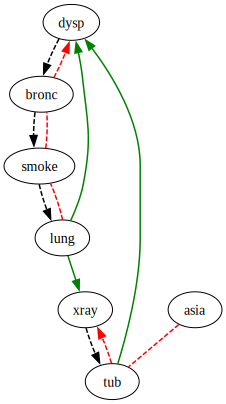

CPU times: user 1.68 s, sys: 140 ms, total: 1.82 s
Wall time: 795 ms
CPU times: user 893 ms, sys: 77.2 ms, total: 970 ms
Wall time: 437 ms


## Results of the data/asia-test2.csv

### Markov equivalence class (PAG)

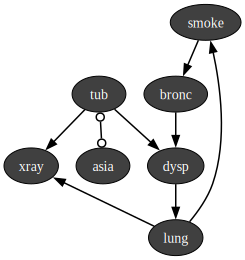

### Causal differences

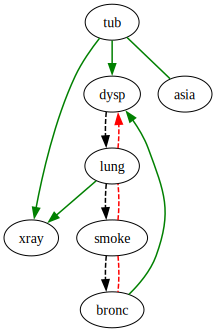

CPU times: user 1.44 s, sys: 130 ms, total: 1.57 s
Wall time: 418 ms
CPU times: user 804 ms, sys: 67.7 ms, total: 871 ms
Wall time: 240 ms


## Results of the data/asia-test3.csv

### Markov equivalence class (PAG)

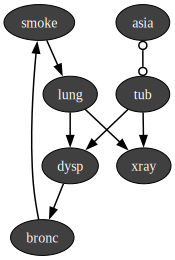

### Causal differences

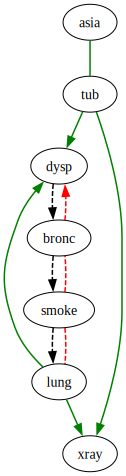

CPU times: user 1.06 s, sys: 96.2 ms, total: 1.15 s
Wall time: 211 ms
CPU times: user 789 ms, sys: 61.7 ms, total: 851 ms
Wall time: 136 ms


## Results of the data/asia-test1.csv

### Markov equivalence class (PAG)

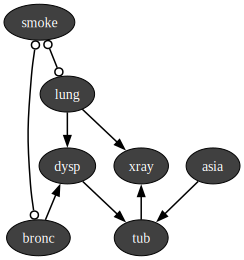

### Causal differences

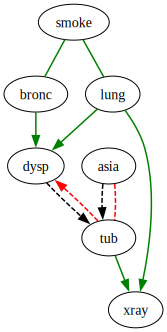

In [6]:
for name in Path("data/").glob("asia-test*"):
    df = pd.read_csv(name)
    df = df.drop(["either"], axis=1)

    learner = gum.BNLearner(df)
    learner.useMIIC()
    
    %time gumPDAG = learner.learnPDAG()
    %time pag, _ = fci(learner, ruleVerbose=False)

    display(
        Markdown(f"## Results of the {name}"),
        Markdown("### Markov equivalence class (PAG)"),
        toDot(pag),
        Markdown("### Causal differences"),
        showCausalDifferences(pag, gumPDAG, learner.names())
    )